# Predicting  Health Insurance Costs

I'll be using machine learning to predict insurance cost based on a number of factors. This dataset was sourced from Kaggle and it has 1338 records. It contains historical data about about customers age, bmi, sex, number of children, region and how much they currently pay for insurance. This project will be help the insurance company predict annual medical insurance for new customers using information such as their age, sex, BMI, children, smoking habits and region of residence.

In [125]:
#import libraries
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

## Load the data

In [126]:
pwd = os.getcwd()
health_df = pd.read_csv(pwd +'/insurance.csv')


In [127]:
health_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
health_df.shape

(1338, 7)

In [9]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
health_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This data set has no null values. There won't be a need for data cleaning

In [11]:
health_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Observation
- This data set contains 1338 rows and 7 columns. Each row contain information about a customer
- There are no null values in this data set
- Age ranges from 18 to 64
- the data in the charges column seems to be skewed as the 50th percentile is much lower than the maximum charge


## Exploratory Analysis and Visualization
I'll explore the columns as they relate to charges, our target variable

<function matplotlib.pyplot.show(close=None, block=None)>

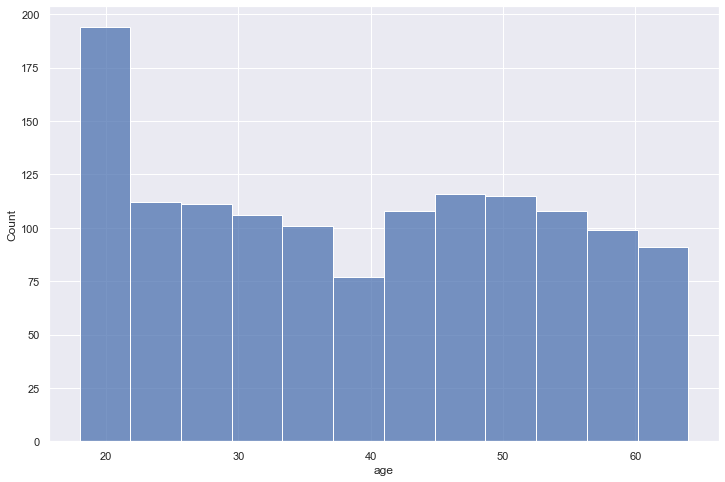

In [21]:
#distribution of age
plt.figure(figsize=[12,8])
sns.histplot(health_df.age)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

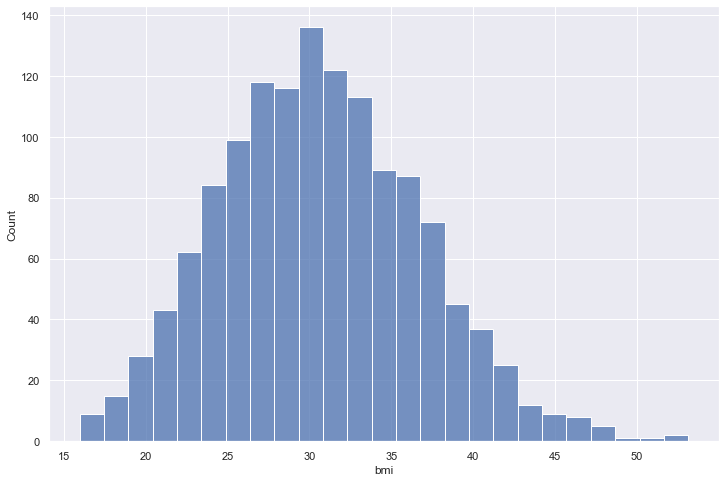

In [22]:
#distribution of bmi
plt.figure(figsize=[12,8])
sns.histplot(health_df.bmi)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

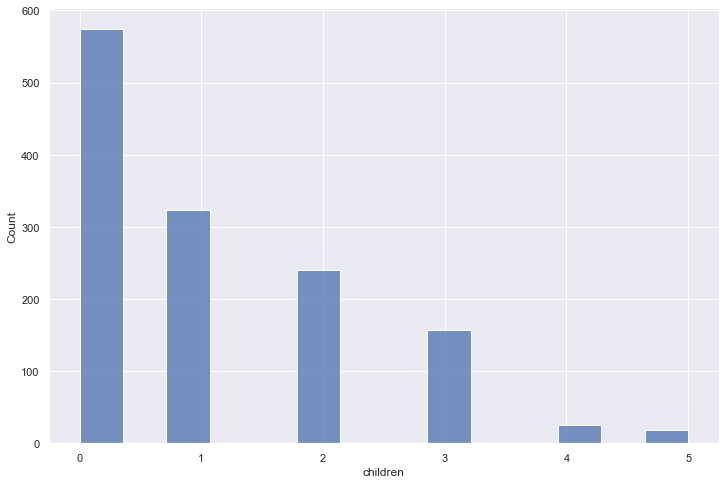

In [89]:
plt.figure(figsize=[12,8])
sns.histplot(health_df.children)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

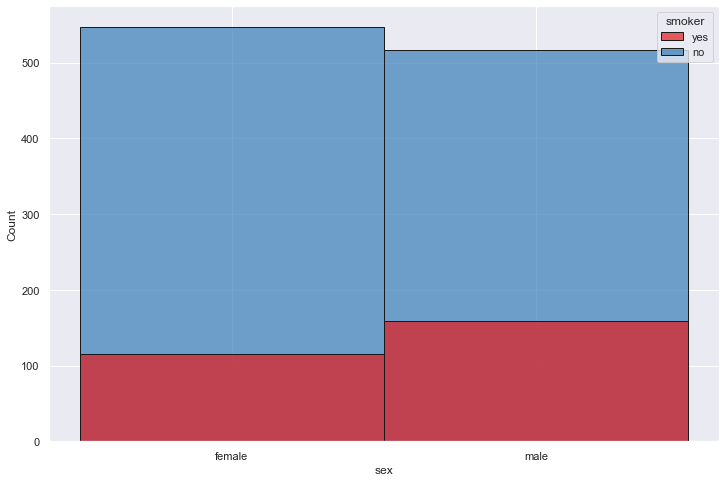

In [77]:
#disttibution of smokers vs non smokers
plt.figure(figsize=[12,8])
sns.histplot(data = health_df, x = 'sex', hue='smoker', alpha =0.7,palette= 'Set1', edgecolor='k')
plt.show

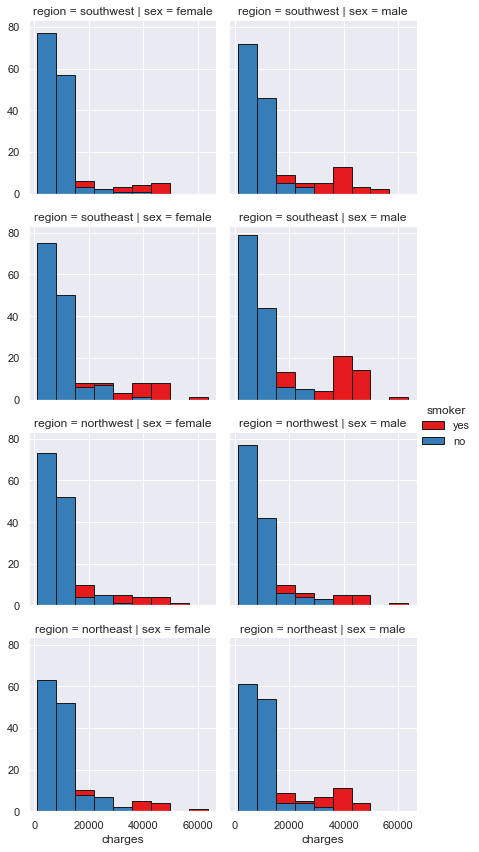

In [57]:
bins = np.linspace(health_df.charges.min(), health_df.charges.max(), 10)
# Form a facetgrid using columns with a hue
sea = sns.FacetGrid(health_df, col = 'sex',row='region', hue= 'smoker', palette= 'Set1')
# map the above form facetgrid with some attributes 
sea.map(plt.hist, 'charges', bins = bins, ec = 'k')
sea.add_legend()
plt.show()

- We have more non-smokers but smokers pay a higher insurance cost across. This trend is the same across all regions

### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot.

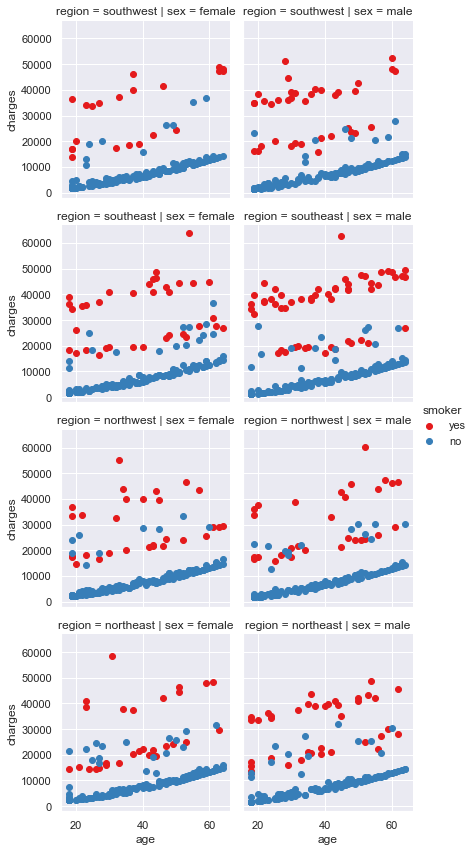

In [86]:
# Form a facetgrid using columns with a hue
sea = sns.FacetGrid(health_df, col = 'sex',row='region', hue= 'smoker', palette= 'Set1')
# map the above form facetgrid with some attributes 
sea.map(plt.scatter, 'age','charges')
sea.add_legend()
plt.show()

- Insurance cost increases with age across all regions. There also seem to be 3 'clusters', mostly among the smokers.

### Bmi and Charges

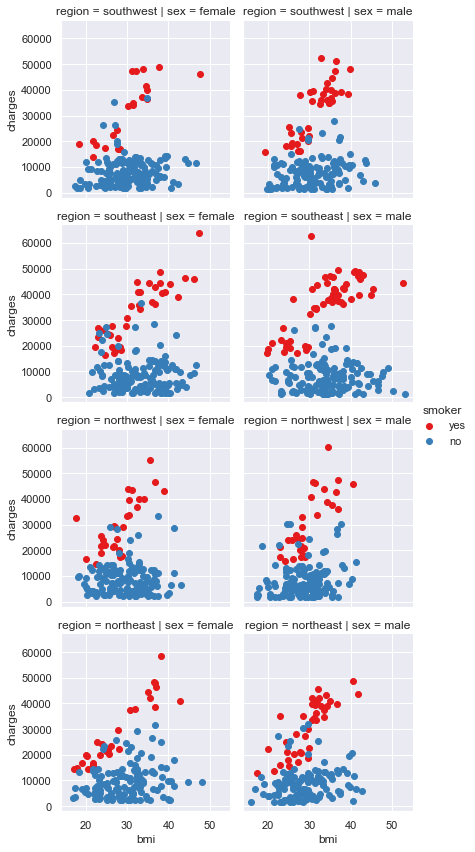

In [87]:
# Form a facetgrid using columns with a hue
sea = sns.FacetGrid(health_df, col = 'sex',row='region', hue= 'smoker', palette= 'Set1')
# map the above form facetgrid with some attributes 
sea.map(plt.scatter, 'bmi','charges')
sea.add_legend()
plt.show()

- There is no relationship between bmi and charges for  non smokers. However for smokers, the charges seem to be significantly higher


children", "sex", "region" and "smoker"

### Children and Charges

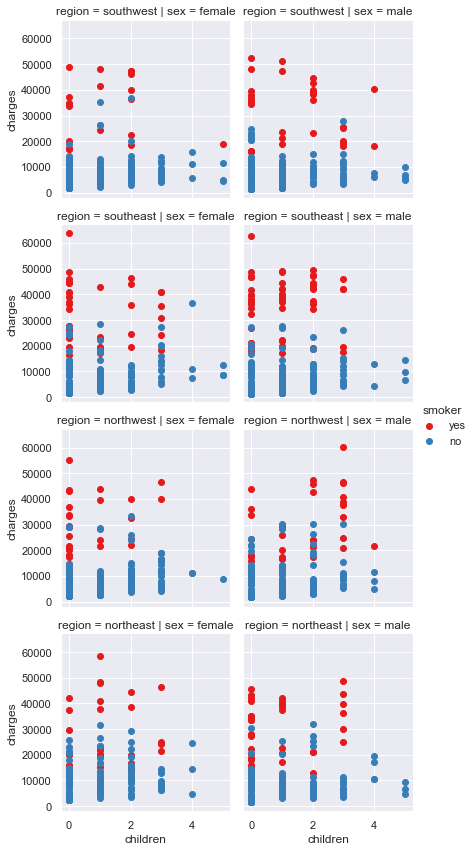

In [88]:
# Form a facetgrid using columns with a hue
sea = sns.FacetGrid(health_df, col = 'sex',row='region', hue= 'smoker', palette= 'Set1')
# map the above form facetgrid with some attributes 
sea.map(plt.scatter, 'children','charges')
sea.add_legend()
plt.show()

- It seems that there are more points at lower charges than at higher charges. I will use a better plot to visualise this observation and look for more trends

<AxesSubplot:xlabel='children', ylabel='charges'>

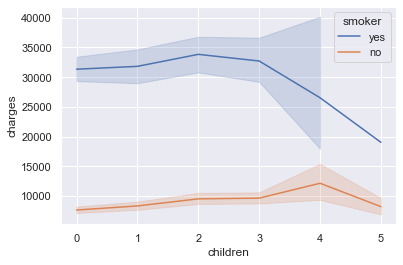

In [91]:
sns.lineplot(data = health_df, x = 'children', y = 'charges', hue = 'smoker')

- surpisingly, the charges begin to decrease when you have more than 3 children

### Categorical columns to Numerical columns (smoker, sex and region columns)

In [128]:
health_df.sex.unique()

array(['female', 'male'], dtype=object)

In [129]:
#sex column
health_df['sex'] =health_df['sex'].map({'female':0, 'male':1})
#smoker column
health_df['smoker']= health_df['smoker'].map({'yes':1, 'no': 0})

In [94]:
#region
health_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [130]:
health_df['region'] =health_df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [131]:
health_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


<AxesSubplot:>

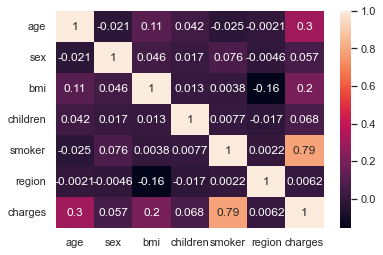

In [179]:
#checking for colinearity
sns.heatmap(health_df.corr(),annot = True)

- no colinearity detected

In [134]:
X= health_df.drop(['charges'], axis = 1)
y = health_df['charges']

In [112]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Train test split

In [113]:
#import library
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [115]:
#import regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Model training

In [136]:
#using linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
#using svm
svm = SVR()
svm.fit(X_train, y_train)
#using random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
#using gradientboosting
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

### Predition 

In [138]:
y_pred1 =lr.predict(X_test)
y_pred2 =svm.predict(X_test)
y_pred3 =rf.predict(X_test)
y_pred4 =gr.predict(X_test)

df1 = pd.DataFrame({'Charges':y_test,'lr':y_pred1,'svm':y_pred2, 'rf':y_pred3,'gr':y_pred4})
df1


,Charges,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.501784,9724.697202,11001.128629
887,5272.17580,7116.295018,9493.253027,5280.442863,5840.174656
890,29330.98315,36909.013521,9648.297116,28006.205732,28001.980112
1293,9301.89355,9507.874691,9555.223014,9775.048868,9745.291602
259,33750.29180,27013.350008,9421.474560,34380.550387,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.419534,46823.603185,45431.423211
575,12222.89830,11814.555568,9625.047904,12520.258116,12465.025294
535,6067.12675,7638.107736,9504.805678,6461.196071,6974.336525
543,63770.42801,40959.081722,9604.855076,46771.684711,47862.047791


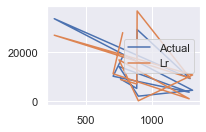

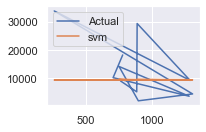

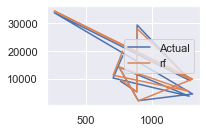

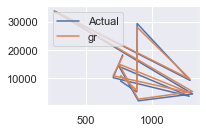

In [148]:
#visual performance of the model
plt.subplot(221)
plt.plot(df1['Charges'].iloc[0:11], label = 'Actual')
plt.plot(df1['lr'].iloc[0:11], label = 'Lr')
plt.legend()
plt.show()

plt.subplot(222)
plt.plot(df1['Charges'].iloc[0:11], label = 'Actual')
plt.plot(df1['svm'].iloc[0:11], label = 'svm')
plt.legend()
plt.show()

plt.subplot(223)
plt.plot(df1['Charges'].iloc[0:11], label = 'Actual')
plt.plot(df1['rf'].iloc[0:11], label = 'rf')
plt.legend()
plt.show()

plt.subplot(224)
plt.plot(df1['Charges'].iloc[0:11], label = 'Actual')
plt.plot(df1['gr'].iloc[0:11], label = 'gr')
plt.legend()
plt.show()


### Evaluation Metrics

In [151]:
from sklearn import metrics

In [152]:
#using R square
r_score1 = metrics.r2_score(y_test, y_pred1)
r_score2 = metrics.r2_score(y_test, y_pred2)
r_score3 = metrics.r2_score(y_test, y_pred3)
r_score4 = metrics.r2_score(y_test, y_pred4)

In [159]:
print('LinearRegression:', r_score1)
print('SVR:', r_score2)
print('RandomForestRegressor:', r_score3)
print('GradientBoostingRegressor:', r_score4)

LinearRegression: 0.7833463107364539
SVR: -0.07230841842488811
RandomForestRegressor: 0.8670485332699923
GradientBoostingRegressor: 0.8779936181637191


In [157]:
from sklearn.metrics import mean_absolute_error

In [160]:
print('LinearRegression:',metrics.mean_absolute_error(y_test, y_pred1))
print('SVR:',metrics.mean_absolute_error(y_test, y_pred2))
print('RandomForestRegressor:',metrics.mean_absolute_error(y_test, y_pred3))
print('GradientBoostingRegressor:',metrics.mean_absolute_error(y_test, y_pred4))

LinearRegression: 4186.508898366434
SVR: 8592.79866979489
RandomForestRegressor: 2451.2002616535465
GradientBoostingRegressor: 2447.167158715136


- Using r square and mean absolute error show that Gradient boosting regressor is the best performing model

Feature Importance

In [161]:
gr.feature_importances_

array([1.17339815e-01, 5.46738411e-04, 1.90038256e-01, 1.06842710e-02,
       6.77885116e-01, 3.50580339e-03])

In [165]:
importance = pd.Series(gr.feature_importances_, index = X_train.columns)
importance

age         0.117340
sex         0.000547
bmi         0.190038
children    0.010684
smoker      0.677885
region      0.003506
dtype: float64

<AxesSubplot:>

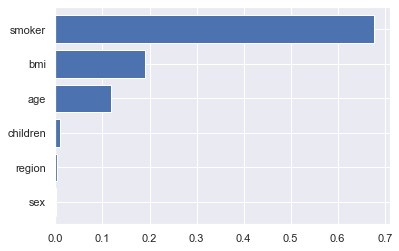

In [173]:
importance.sort_values().plot(kind='barh', width= 0.8)